# Importing libraries

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data pre-processing and main info

In [31]:
# Define the path to the CSV file. Make sure this path is correct if your file is in a different location.
file_path = 'C:\\Documents\\Pro\\10-Supervised_learning\\Final_project\\Supervised_learning_presentation\\KAG_conversion_data.csv'

# Read the CSV file into a pandas DataFrame.
try:
    df = pd.read_csv(file_path)

    # Display the first 5 rows of the DataFrame to get a quick look at the data structure and content.
    print("First 5 rows of the DataFrame:")
    display(df.head())

    # Display information about the DataFrame, including the index dtype and column dtypes, non-null values and memory usage.
    print("\nDataFrame information:")
    display(df.info())

except FileNotFoundError:
    print(f"Error: The file was not found at {file_path}")
except Exception as e:
    print(f"An error occurred: {e}")

First 5 rows of the DataFrame:


,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
0,708746,916,103916,30-34,M,15,7350,1,1.43,2,1
1,708749,916,103917,30-34,M,16,17861,2,1.82,2,0
2,708771,916,103920,30-34,M,20,693,0,0.00,1,0
3,708815,916,103928,30-34,M,28,4259,1,1.25,1,0
4,708818,916,103928,30-34,M,28,4133,1,1.29,1,1



DataFrame information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ad_id                1143 non-null   int64  
 1   xyz_campaign_id      1143 non-null   int64  
 2   fb_campaign_id       1143 non-null   int64  
 3   age                  1143 non-null   object 
 4   gender               1143 non-null   object 
 5   interest             1143 non-null   int64  
 6   Impressions          1143 non-null   int64  
 7   Clicks               1143 non-null   int64  
 8   Spent                1143 non-null   float64
 9   Total_Conversion     1143 non-null   int64  
 10  Approved_Conversion  1143 non-null   int64  
dtypes: float64(1), int64(8), object(2)
memory usage: 98.4+ KB


None

## Converting text data to categorical and description

In [32]:
columns_to_convert = ['ad_id', 'xyz_campaign_id', 'fb_campaign_id', 'age', 'gender', 'interest']
for col in columns_to_convert:
    df[col] = df[col].astype('category')

# Display the data types to confirm the conversion
print("Data types after conversion:")
display(df.dtypes)


# Display descriptive statistics of the DataFrame, including count, mean, standard deviation, min, max, and quartiles.
print("\nDataFrame descriptive statistics:")
display(df.describe().round(2))

# Display descriptive statistics of the DataFrame for categorical data
print("\nDataFrame descriptive statistics for categorical data:")
display(df[['ad_id', 'xyz_campaign_id', 'fb_campaign_id', 'age', 'gender', 'interest']].describe())

Data types after conversion:


ad_id                  category
xyz_campaign_id        category
fb_campaign_id         category
age                    category
gender                 category
interest               category
Impressions               int64
Clicks                    int64
Spent                   float64
Total_Conversion          int64
Approved_Conversion       int64
dtype: object


DataFrame descriptive statistics:


,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
count,1143.00,1143.00,1143.00,1143.00,1143.00
mean,186732.13,33.39,51.36,2.86,0.94
std,312762.18,56.89,86.91,4.48,1.74
min,87.00,0.00,0.00,0.00,0.00
25%,6503.50,1.00,1.48,1.00,0.00
50%,51509.00,8.00,12.37,1.00,1.00
75%,221769.00,37.50,60.02,3.00,1.00
max,3052003.00,421.00,639.95,60.00,21.00



DataFrame descriptive statistics for categorical data:


,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest
count,1143,1143,1143,1143,1143,1143
unique,1143,3,691,4,2,40
top,708746,1178,144599,30-34,M,16
freq,1,625,6,426,592,140


## Dropping unique id

In [33]:
# Drop the 'ad_id' column
df = df.drop('ad_id', axis=1)

# Display the columns of the DataFrame to confirm the column has been dropped
print("Columns of the DataFrame after dropping 'ad_id':")
display(df.columns)

Columns of the DataFrame after dropping 'ad_id':


Index(['xyz_campaign_id', 'fb_campaign_id', 'age', 'gender', 'interest',
       'Impressions', 'Clicks', 'Spent', 'Total_Conversion',
       'Approved_Conversion'],
      dtype='object')

# EDA - Visualisations

## Univariate analysis - categorical variables

### Subtask:
Generate visualizations (histograms, boxplots and pie charts) to understand their distributions.


## Numerical data visualisations - histograms

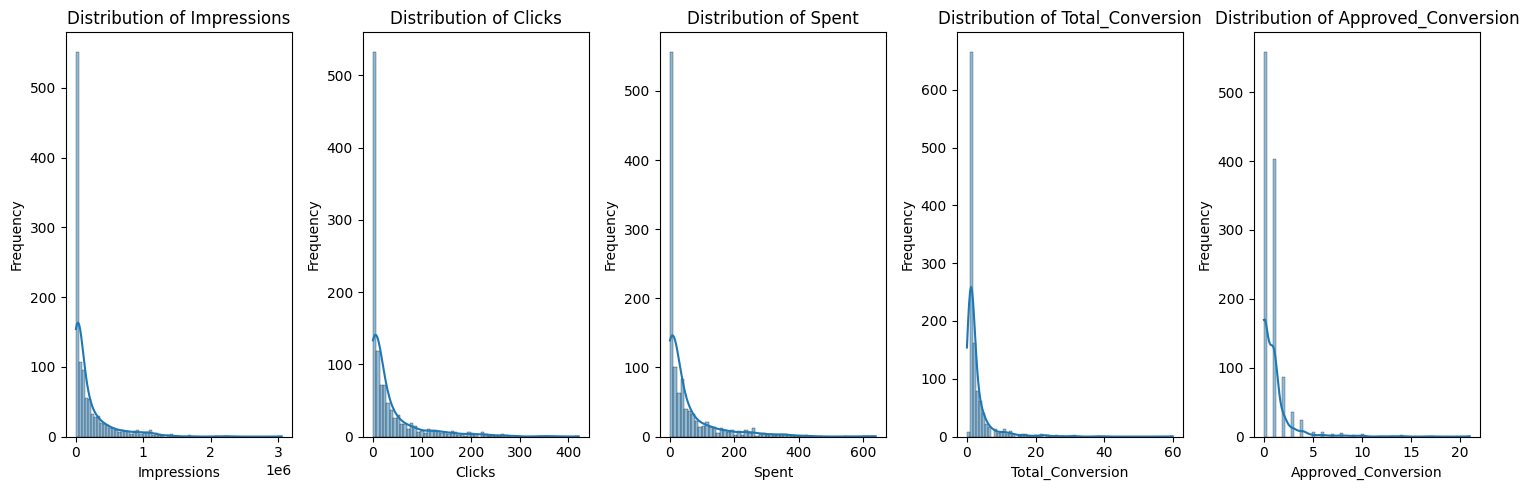

In [34]:
# Select numerical columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Determine the number of rows and columns for subplots
n_cols = 5
n_rows = (len(numerical_cols) + n_cols - 1) // n_cols

# Create subplots for histograms
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 5))
axes = axes.flatten() # Flatten the 2D array of axes for easy iteration

# Generate histograms for each numerical column
for i, col in enumerate(numerical_cols):
    sns.histplot(ax=axes[i], x=df[col], kde=True)
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

## Numerical data visualisations - boxplots

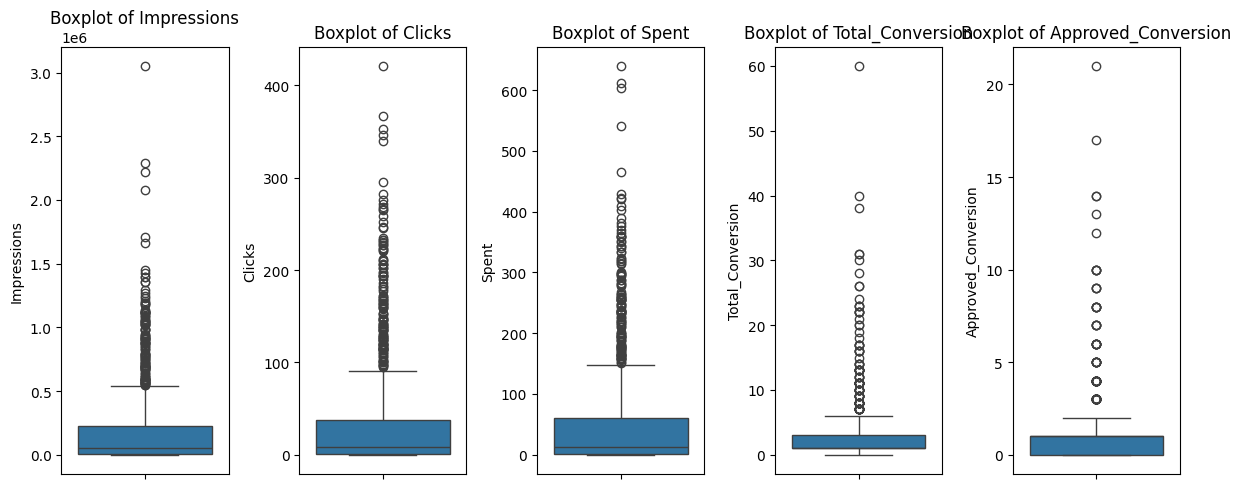

In [35]:
# Select numerical columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Determine the number of rows and columns for subplots
n_cols = 5
n_rows = (len(numerical_cols) + n_cols - 1) // n_cols

# Create subplots for boxplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, n_rows * 5))
axes = axes.flatten() # Flatten the 2D array of axes for easy iteration

# Generate boxplots for each numerical column
for i, col in enumerate(numerical_cols):
    sns.boxplot(ax=axes[i], y=df[col])
    axes[i].set_title(f'Boxplot of {col}')
    axes[i].set_ylabel(col)

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

## Categorical data - visualisations

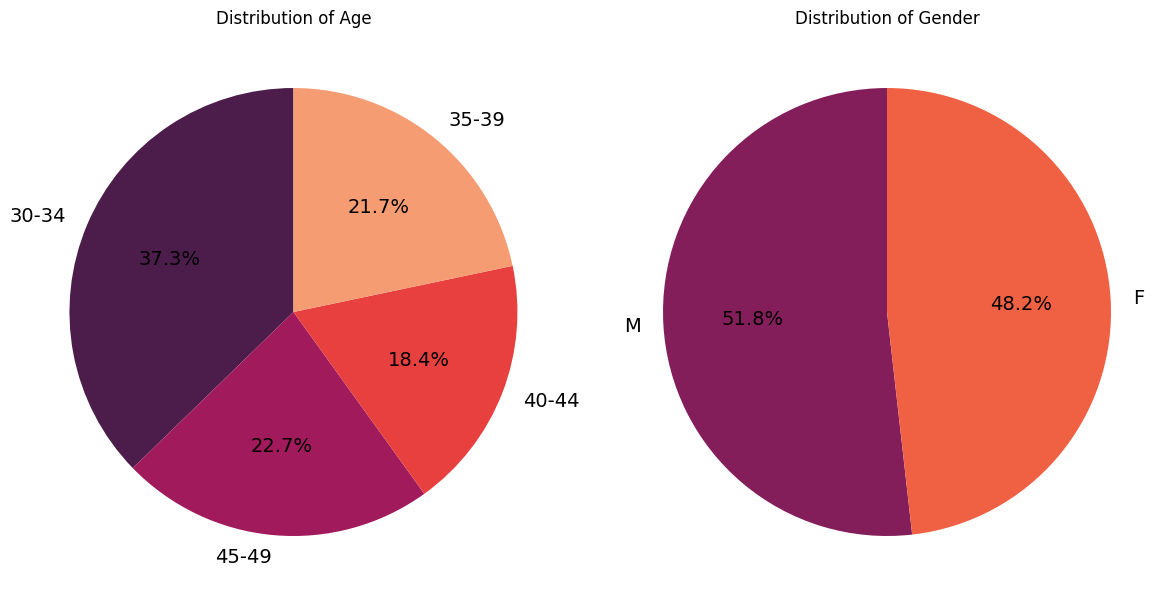

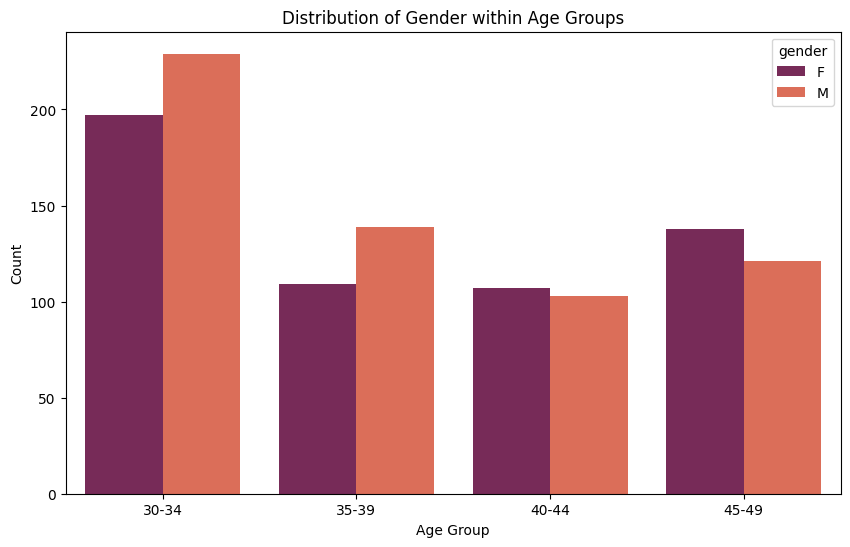

In [36]:
# Calculate value counts for pie charts
age_counts = df['age'].value_counts()
gender_counts = df['gender'].value_counts()

# Define the desired order for age groups
age_order = ['30-34', '45-49', '40-44', '35-39']

# Reindex age_counts to the desired order
age_counts = age_counts.reindex(age_order)


# Create another figure with two subplots for pie charts of 'age' and 'gender'
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Define a color palette for the pie charts
colors_age = sns.color_palette('rocket', len(age_counts))
colors_gender = sns.color_palette('rocket', len(gender_counts))

# Define text properties for the pie chart labels
textprops = {'fontsize': 14, 'color': 'black'} # Adjust fontsize as needed

# Pie chart for 'age'
axes[0].pie(age_counts, labels=age_counts.index, autopct='%1.1f%%', startangle=90, colors=colors_age, textprops=textprops)
axes[0].set_title('Distribution of Age')

# Pie chart for 'gender'
axes[1].pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90, colors=colors_gender, textprops=textprops)
axes[1].set_title('Distribution of Gender')

plt.tight_layout()
plt.show()


# Create a grouped bar chart of gender by age group
plt.figure(figsize=(10, 6))
sns.countplot(x='age', hue='gender', data=df, palette='rocket')
plt.title('Distribution of Gender within Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.show()

## Bivariate analysis - numerical data

### Subtask:
Calculate and visualize the correlation matrix for the numerical variables to explore relationships between them.


**Reasoning**:
Select numerical columns, calculate the correlation matrix, and visualize it using a heatmap with annotations.



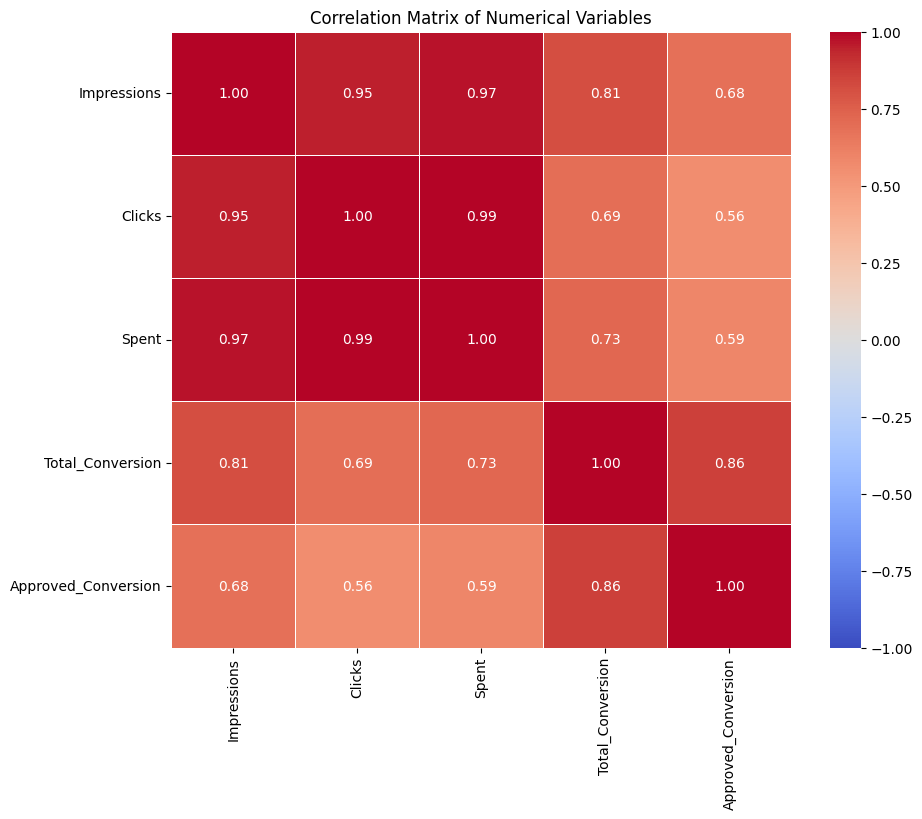

In [37]:
# Select numerical columns
numerical_df = df.select_dtypes(include=['int64', 'float64'])

# Calculate the correlation matrix
correlation_matrix = numerical_df.corr()

# Generate a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5, vmin=-1, vmax=1)
plt.title('Correlation Matrix of Numerical Variables')
plt.show()

# Dropping the unused correlated columns

In [38]:
# Drop the 'Impressions', 'Clicks', and 'Total_Conversion' columns
df = df.drop(['Impressions', 'Clicks', 'Total_Conversion'], axis=1)

# Display the columns of the DataFrame to confirm the columns have been dropped
print("Columns of the DataFrame after dropping 'Impressions', 'Clicks', and 'Total_Conversion':")
display(df.columns)

Columns of the DataFrame after dropping 'Impressions', 'Clicks', and 'Total_Conversion':


Index(['xyz_campaign_id', 'fb_campaign_id', 'age', 'gender', 'interest',
       'Spent', 'Approved_Conversion'],
      dtype='object')

## Further bivariate analysis - categorical data

### Subtask:
Explore relationships between other categorical variables.


**Reasoning**:
Create box plots to visualize the relationship between 'age' and 'Spent', and 'gender' and 'Spent'.



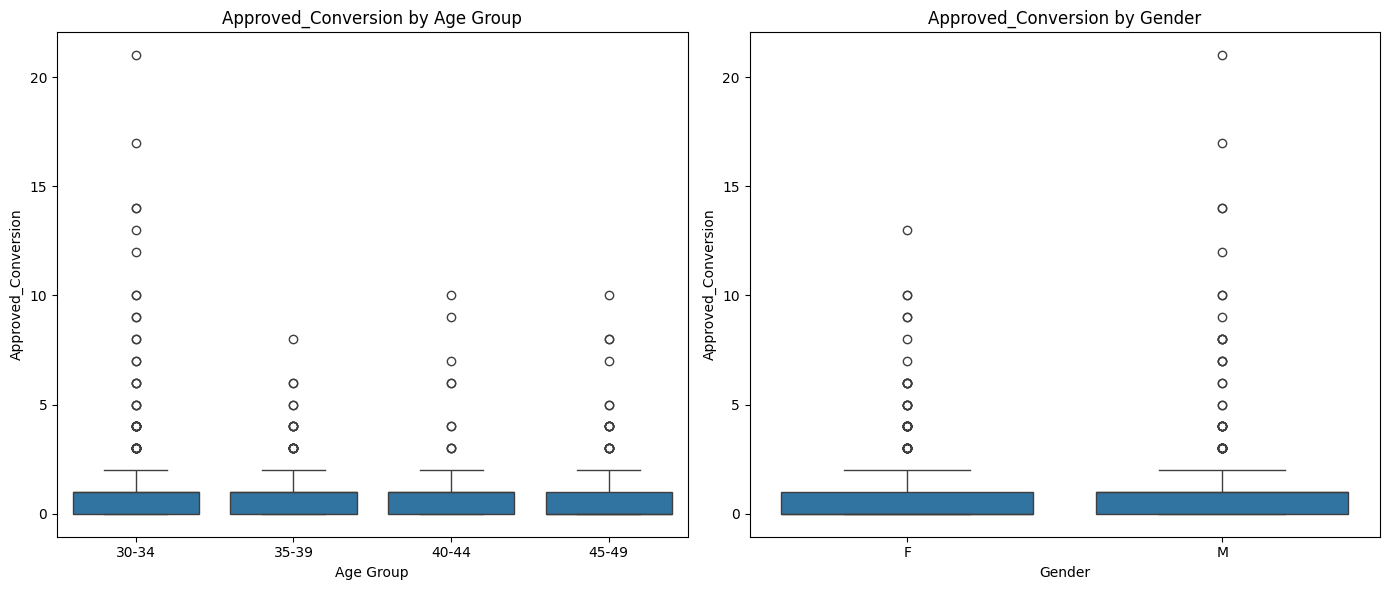

In [39]:
# Create a single figure for the box plots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Box plot for 'age' vs 'Spent'
sns.boxplot(ax=axes[0], x='age', y='Approved_Conversion', data=df)
axes[0].set_title('Approved_Conversion by Age Group')
axes[0].set_xlabel('Age Group')
axes[0].set_ylabel('Approved_Conversion')

# Box plot for 'gender' vs 'Spent'
sns.boxplot(ax=axes[1], x='gender', y='Approved_Conversion', data=df)
axes[1].set_title('Approved_Conversion by Gender')
axes[1].set_xlabel('Gender')
axes[1].set_ylabel('Approved_Conversion')

plt.tight_layout()
plt.show()

## The interest case

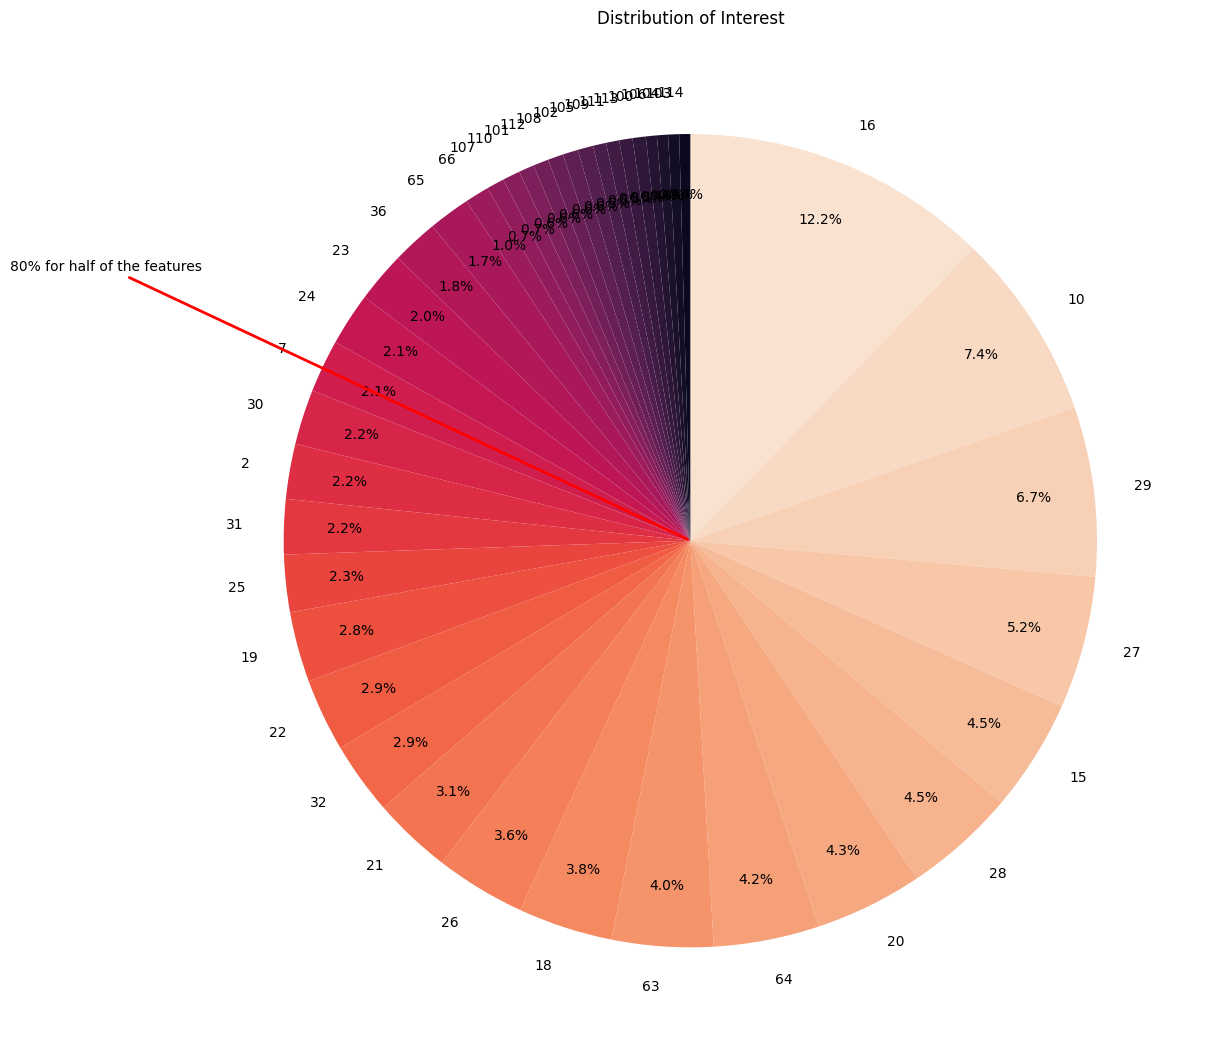

In [40]:
# Calculate value counts for the 'interest' column
interest_counts = df['interest'].value_counts()

# Calculate the percentage of each interest group
interest_percentages = interest_counts / interest_counts.sum() * 100

# Calculate cumulative percentages (starting from largest for the threshold line)
interest_counts_desc = interest_counts.sort_values(ascending=False)
interest_percentages_desc = interest_counts_desc / interest_counts_desc.sum() * 100
cumulative_percentages_desc = interest_percentages_desc.cumsum()

# Find the index where the cumulative percentage reaches at least 80% (from largest)
threshold_index_desc = cumulative_percentages_desc[cumulative_percentages_desc >= 80].index[0]
threshold_percentage = cumulative_percentages_desc[threshold_index_desc]

# Create a figure for the pie chart
plt.figure(figsize=(12, 12))

# Define a color palette for the pie chart
colors_interest = sns.color_palette('rocket', len(interest_counts))

# Reverse the color order as before
colors_interest = colors_interest[::-1]

# Define text properties for the pie chart labels
textprops = {'fontsize': 10, 'color': 'black'}

# Pie chart for 'interest' (using the original order for slices)
wedges, texts, autotexts = plt.pie(interest_counts, labels=interest_counts.index, autopct='%1.1f%%', startangle=90, colors=colors_interest, textprops=textprops, pctdistance=0.85, counterclock=False)
plt.title('Distribution of Interest')

# Add a red line at the 80% cumulative threshold (calculated from largest)
# To find the angle for the threshold in the current pie chart order,
# we need to find the cumulative percentage of the categories *before* the threshold_index_desc in the original list order.
# Let's calculate cumulative percentages in the original order
cumulative_percentages_original = interest_percentages.cumsum()

# Find the cumulative percentage in the original order up to the threshold index from the descending list
# This requires finding the position of threshold_index_desc in the original index.
# If the threshold index is in the original index, we sum up to that point.
# If not, we need to find the correct point in the original cumulative sum.

# A more robust way is to calculate the angle based on the cumulative percentage in the original order that corresponds to the 80% from largest.
# This means finding which categories in the original order contribute to the top 80% when sorted by size.

# Let's find the categories that make up the top 80% when sorted by size
top_80_percent_categories = cumulative_percentages_desc[cumulative_percentages_desc < 80].index.tolist() + [threshold_index_desc]

# Calculate the cumulative percentage in the original order for these categories
cumulative_percentage_for_top_80_in_original_order = interest_percentages[top_80_percent_categories].sum()


# Calculate the angle for the threshold based on this cumulative percentage in the original order
# Since counterclock is False, we subtract the percentage from 90 degrees.
threshold_angle = 90 - (cumulative_percentage_for_top_80_in_original_order / 100) * 360


# Import numpy for trigonometric functions
import numpy as np

# Draw a red line from the center to the edge of the pie
# Adjust the annotation position for clarity
plt.annotate(f'80% for half of the features',
             xy=(0, 0), xytext=(1.8 * np.cos(threshold_angle * np.pi / 180), 1.8 * np.sin(threshold_angle * np.pi / 180)),
             arrowprops=dict(arrowstyle="-", color='red', lw=2))


plt.tight_layout()
plt.show()

C:\Users\lilid\AppData\Local\Temp\ipykernel_34200\2738331851.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=interest_conversion_sum.index, y=interest_conversion_sum.values, palette='rocket', order=interest_conversion_sum.index)


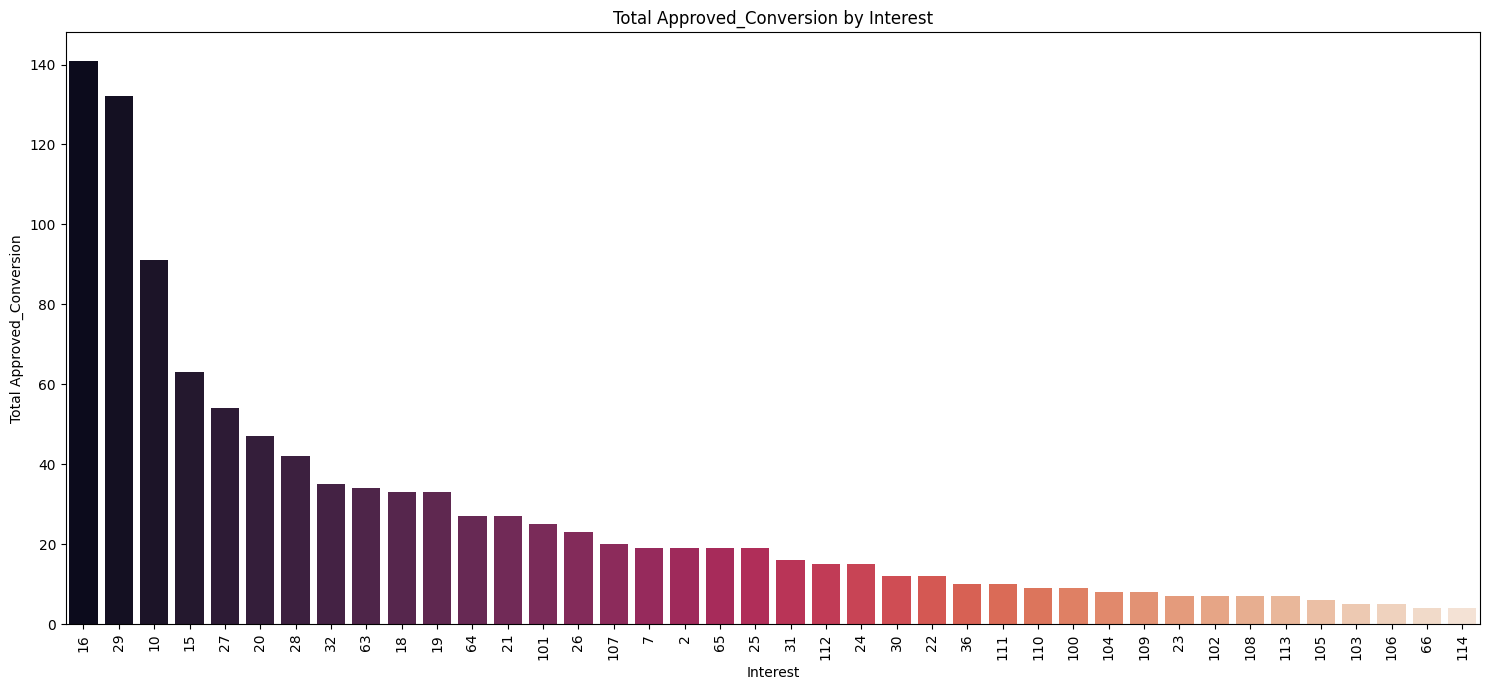

In [41]:
# Calculate the sum of Approved_Conversion for each interest group and sort in descending order
interest_conversion_sum = df.groupby('interest', observed=False)['Approved_Conversion'].sum().sort_values(ascending=False)

# Create a bar plot
plt.figure(figsize=(15, 7))
sns.barplot(x=interest_conversion_sum.index, y=interest_conversion_sum.values, palette='rocket', order=interest_conversion_sum.index)
plt.title('Total Approved_Conversion by Interest')
plt.xlabel('Interest')
plt.ylabel('Total Approved_Conversion')
plt.xticks(rotation=90) # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

## Correlation between frequency and efficience

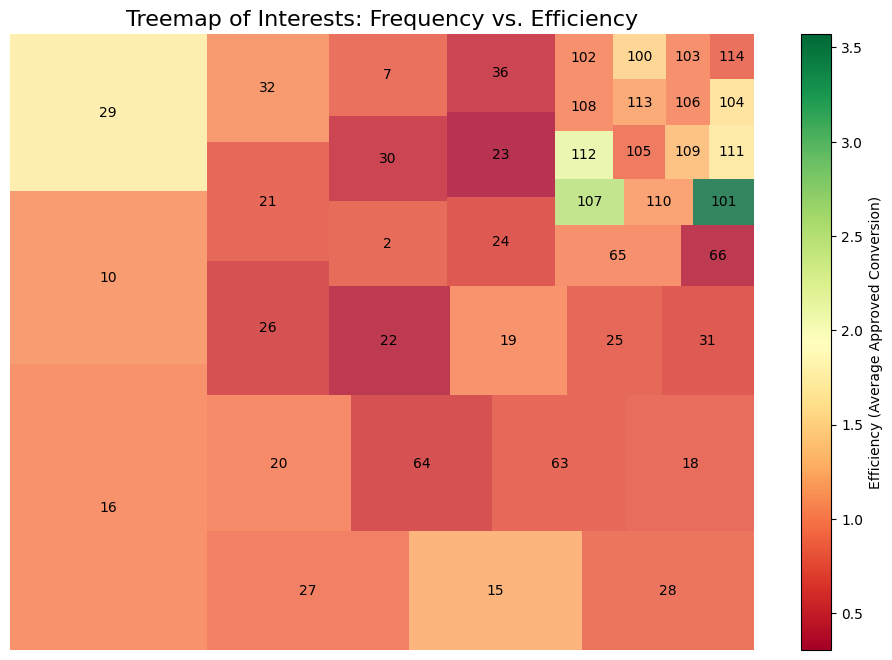

In [42]:
import squarify
import matplotlib.cm as cm
import matplotlib.pyplot as plt


# Calculate the frequency of each interest group
interest_frequency = df['interest'].value_counts()

# Calculate the average Approved_Conversion for each interest group
interest_efficiency = df.groupby('interest', observed=False)['Approved_Conversion'].mean()

# Calculate the average Spent for each interest group
average_spent = df.groupby('interest', observed=False)['Spent'].mean()

# Combine the frequency, efficiency, and average spent into a single DataFrame
interest_analysis_df = pd.DataFrame({
    'Frequency': interest_frequency,
    'Efficiency': interest_efficiency,
    'Average_Spent': average_spent
})

# Ensure both series have the same index (all interest levels)
interest_analysis_df = interest_analysis_df.reindex(interest_frequency.index)

# Use 'Frequency' for size and 'Efficiency' for color
sizes = interest_analysis_df['Frequency']
colors = interest_analysis_df['Efficiency']
labels = interest_analysis_df.index

# Normalize colors for the colormap
norm = plt.Normalize(colors.min(), colors.max())
cmap = cm.RdYlGn # Red-Yellow-Green colormap

# Create a figure and axes
fig, ax = plt.subplots(1, figsize=(12, 8))

# Create the treemap and store the result
# We don't strictly need to store the result of squarify.plot for the colorbar in this case
squarify.plot(sizes=sizes, label=labels, color=cmap(norm(colors)), alpha=0.8, text_kwargs={'fontsize':10, 'color':'black'}, ax=ax)

# Add a color bar using the figure and the ScalarMappable object
sm = cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([]) # Needed for matplotlib < 3.1, doesn't hurt otherwise
fig.colorbar(sm, ax=ax, label='Efficiency (Average Approved Conversion)') # Pass the ScalarMappable object

plt.title('Treemap of Interests: Frequency vs. Efficiency', fontsize=16)
plt.axis('off') # Hide the axes
plt.show()

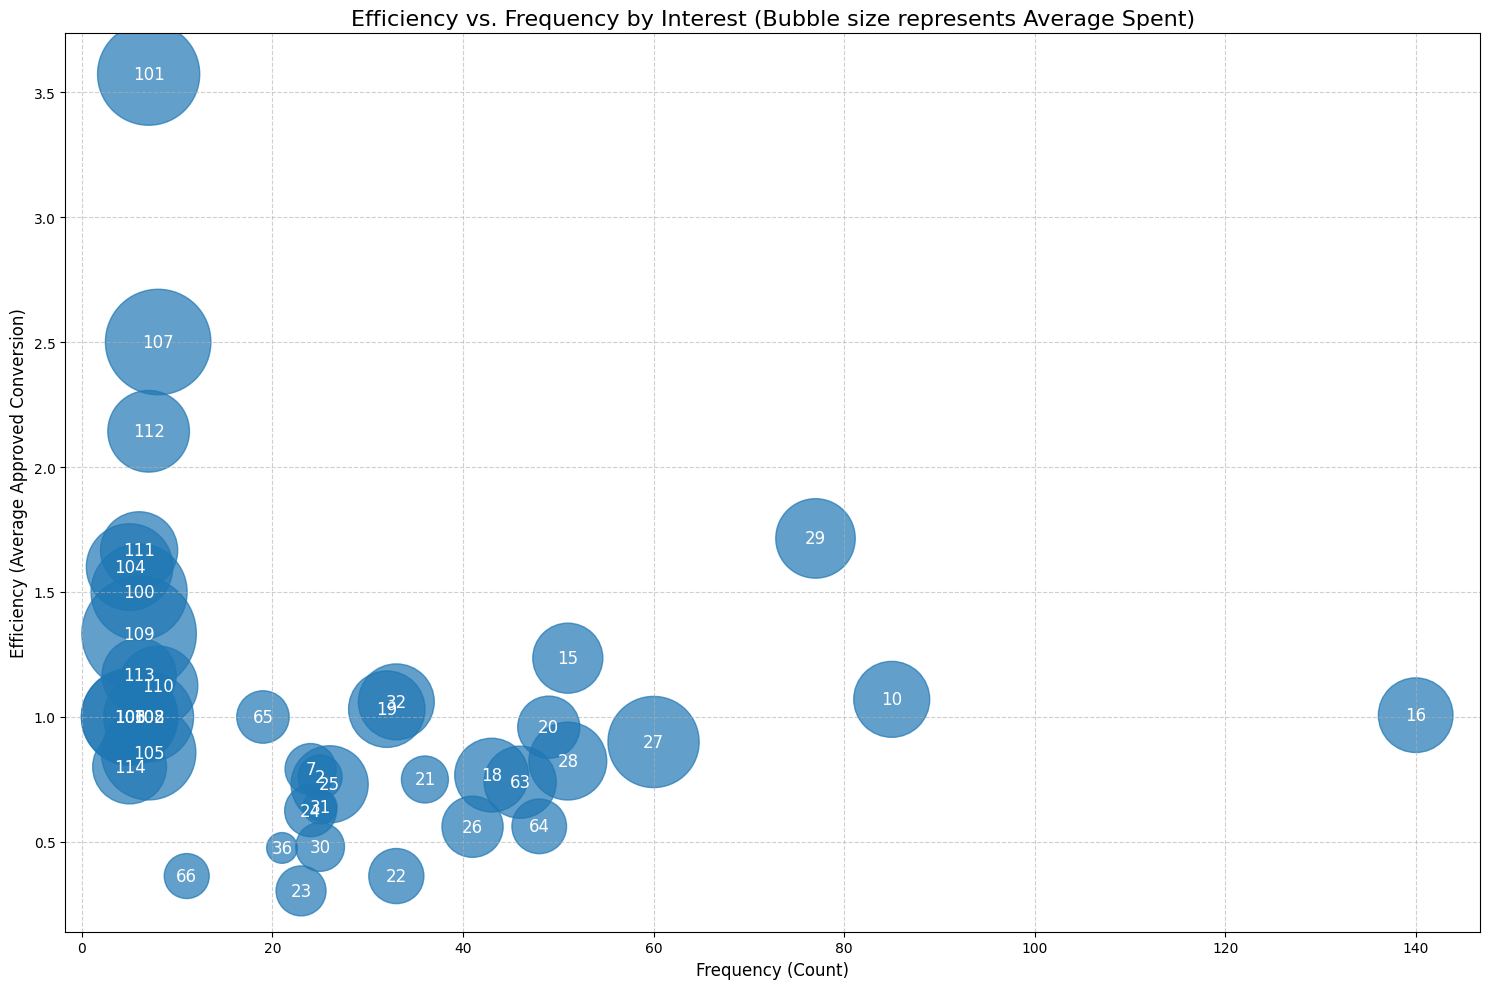

In [43]:
# Create the scatter plot
plt.figure(figsize=(15, 10))
# Use Average_Spent for size, scale it for better visualization
scatter = plt.scatter(interest_analysis_df['Frequency'], interest_analysis_df['Efficiency'],
                      s=interest_analysis_df['Average_Spent'] * 50, # Scale factor for bubble size
                      alpha=0.7)

# Add labels to each point
for i, interest_id in enumerate(interest_analysis_df.index):
    plt.text(interest_analysis_df['Frequency'].iloc[i], interest_analysis_df['Efficiency'].iloc[i], str(interest_id),
             fontsize=12, ha='center', va='center', color='white') # Changed color to black and vertical alignment to bottom

# Add title and labels
plt.title('Efficiency vs. Frequency by Interest (Bubble size represents Average Spent)', fontsize=16)
plt.xlabel('Frequency (Count)', fontsize=12)
plt.ylabel('Efficiency (Average Approved Conversion)', fontsize=12)

# Add a grid for better readability
plt.grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

# Target: ROI or conversion ? The zero-value cases

In [44]:
# Condition 1: spent = 0 and approved_conversion = 0
print("Row(s) where Spent = 0 and Approved_Conversion = 0:")
condition1_df = df[(df['Spent'] == 0) & (df['Approved_Conversion'] == 0)]
if not condition1_df.empty:
    display(condition1_df.head(1))
else:
    print("No rows found for this condition.")

print("\n" + "="*30 + "\n")

# Condition 2: spent = 0 and approved_conversion > 0
print("Row(s) where Spent = 0 and Approved_Conversion > 0:")
condition2_df = df[(df['Spent'] == 0) & (df['Approved_Conversion'] > 0)]
if not condition2_df.empty:
    display(condition2_df.head(1))
else:
    print("No rows found for this condition.")

print("\n" + "="*30 + "\n")

# Condition 3: spent > 0 and approved_conversion = 0
print("Row(s) where Spent > 0 and Approved_Conversion = 0:")
condition3_df = df[(df['Spent'] > 0) & (df['Approved_Conversion'] == 0)]
if not condition3_df.empty:
    display(condition3_df.head(1))
else:
    print("No rows found for this condition.")

print("\n" + "="*30 + "\n")

# Condition 4: spent > 0 and approved_conversion > 0
print("Row(s) where Spent > 0 and Approved_Conversion > 0:")
condition4_df = df[(df['Spent'] > 0) & (df['Approved_Conversion'] > 0)]
if not condition4_df.empty:
    display(condition4_df.head(1))
else:
    print("No rows found for this condition.")

Row(s) where Spent = 0 and Approved_Conversion = 0:


,xyz_campaign_id,fb_campaign_id,age,gender,interest,Spent,Approved_Conversion
2,916,103920,30-34,M,20,0.0,0




Row(s) where Spent = 0 and Approved_Conversion > 0:


,xyz_campaign_id,fb_campaign_id,age,gender,interest,Spent,Approved_Conversion
5,916,103929,30-34,M,29,0.0,1




Row(s) where Spent > 0 and Approved_Conversion = 0:


,xyz_campaign_id,fb_campaign_id,age,gender,interest,Spent,Approved_Conversion
1,916,103917,30-34,M,16,1.82,0




Row(s) where Spent > 0 and Approved_Conversion > 0:


,xyz_campaign_id,fb_campaign_id,age,gender,interest,Spent,Approved_Conversion
0,916,103916,30-34,M,15,1.43,1


In [45]:
# Calculate the percentage of rows where 'Spent' is 0
spent_zero_percentage = (df['Spent'] == 0).mean() * 100

# Calculate the percentage of rows where 'Approved_Conversion' is 0
approved_conversion_zero_percentage = (df['Approved_Conversion'] == 0).mean() * 100

print(f"Percentage of rows where Spent = 0: {spent_zero_percentage:.0f}%")
print(f"Percentage of rows where Approved_Conversion = 0: {approved_conversion_zero_percentage:.0f}%")

Percentage of rows where Spent = 0: 18%
Percentage of rows where Approved_Conversion = 0: 49%


In [46]:
# Add a new column 'Spent_Conversion_Ratio' to df
# Calculate the ratio Spent/Approved_conversion, handle division by zero by setting the ratio to 0
df['Spent_on_Conversion_Ratio'] = df.apply(lambda row: row['Spent'] / row['Approved_Conversion'] if row['Approved_Conversion'] != 0 else 0, axis=1)

# Display the first few rows with the new column
print("DataFrame with 'Spent_Conversion_Ratio':")
display(df.head())

DataFrame with 'Spent_Conversion_Ratio':


,xyz_campaign_id,fb_campaign_id,age,gender,interest,Spent,Approved_Conversion,Spent_on_Conversion_Ratio
0,916,103916,30-34,M,15,1.43,1,1.43
1,916,103917,30-34,M,16,1.82,0,0.00
2,916,103920,30-34,M,20,0.00,0,0.00
3,916,103928,30-34,M,28,1.25,0,0.00
4,916,103928,30-34,M,28,1.29,1,1.29
